In [2]:
import numpy as np
import pandas as pd
import os
import string

In [3]:
dataset = pd.read_csv("leafall.csv")

In [4]:
dataset.head(5)

,Unnamed: 0,area,Eccentridity,Extent,Contour Perimeter,Solidity,Equivalent Diameter,Perimeter Area Ratio
0,0,197787.0,0.978327,0.184032,3479.036035,0.981929,501.826892,0.017590
1,1,101297.0,0.979862,0.654247,2491.210239,0.975290,359.131377,0.024593
2,2,86626.5,0.979615,0.664191,2291.511754,0.974278,332.108846,0.026453
3,3,190481.0,0.952403,0.568556,2858.479352,0.977385,492.471260,0.015007
4,4,228035.0,0.914700,0.601755,2920.420478,0.959428,538.835021,0.012807


In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
#maindir = r'D:\Projects\Plant Leaf Identification'
ds_path = "./images/Leaves"
img_files = os.listdir(ds_path)

In [7]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

print (len(breakpoints))


64


In [8]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [9]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [10]:
X = dataset.iloc[:,1:]
X

,area,Eccentridity,Extent,Contour Perimeter,Solidity,Equivalent Diameter,Perimeter Area Ratio
0,197787.0,0.978327,0.184032,3479.036035,0.981929,501.826892,0.017590
1,101297.0,0.979862,0.654247,2491.210239,0.975290,359.131377,0.024593
2,86626.5,0.979615,0.664191,2291.511754,0.974278,332.108846,0.026453
3,190481.0,0.952403,0.568556,2858.479352,0.977385,492.471260,0.015007
4,228035.0,0.914700,0.601755,2920.420478,0.959428,538.835021,0.012807
...,...,...,...,...,...,...,...
1902,704713.5,0.813051,0.433450,4303.871605,0.942229,947.242892,0.006107
1903,726548.0,0.788441,0.426679,4391.511215,0.937619,961.805409,0.006044
1904,740823.5,0.734129,0.482488,4225.621823,0.940877,971.208410,0.005704
1905,727779.0,0.787587,0.422156,4457.687840,0.927633,962.619864,0.006125


In [11]:
X.head(5)

,area,Eccentridity,Extent,Contour Perimeter,Solidity,Equivalent Diameter,Perimeter Area Ratio
0,197787.0,0.978327,0.184032,3479.036035,0.981929,501.826892,0.017590
1,101297.0,0.979862,0.654247,2491.210239,0.975290,359.131377,0.024593
2,86626.5,0.979615,0.664191,2291.511754,0.974278,332.108846,0.026453
3,190481.0,0.952403,0.568556,2858.479352,0.977385,492.471260,0.015007
4,228035.0,0.914700,0.601755,2920.420478,0.959428,538.835021,0.012807


In [12]:
y[0:5]

y

array([ 0,  0,  0, ..., 31, 31, 31])

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

# X_trimmed = X[:1566]  # Giữ lại chỉ 1566 mẫu đầu tiên trong X
# y_trimmed = y[:1566]  # Giữ lại chỉ 1566 mẫu đầu tiên trong y
# # Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X_trimmed, y_trimmed, test_size=0.3, random_state=142)

In [15]:
X_train.head(5)

,area,Eccentridity,Extent,Contour Perimeter,Solidity,Equivalent Diameter,Perimeter Area Ratio
147,816709.0,0.117034,0.684938,3599.604583,0.965319,1019.738297,0.004407
837,921651.0,0.466571,0.643260,4100.217711,0.974272,1083.273973,0.004449
358,552595.5,0.849361,0.376812,3851.400599,0.992073,838.800598,0.006970
962,38792.5,0.997308,0.040096,3037.410695,0.582636,222.243436,0.078299
1101,941357.5,0.254965,0.731229,3719.822837,0.995420,1094.793859,0.003952


In [16]:

y_train[0:5]

array([ 3, 13,  6, 16, 18])

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
X_train[0:2]

array([[ 0.83107496, -1.7174676 ,  0.91109593, -0.1662643 ,  0.33903586,
         0.76136379, -0.12383673],
       [ 1.22798745, -0.47853138,  0.68130381,  0.47033473,  0.42301904,
         1.02875636, -0.12363364]])

In [20]:
y_train[0:2]

array([ 3, 13])

In [21]:
from sklearn import svm

In [22]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [23]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn import metrics

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.631762652705061

In [26]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36        18
           1       0.21      0.17      0.19        18
           2       0.90      0.86      0.88        22
           3       0.76      0.96      0.85        27
           4       1.00      1.00      1.00        24
           5       0.87      0.81      0.84        16
           6       0.46      0.55      0.50        20
           7       0.83      0.71      0.77        14
           8       0.11      0.08      0.10        12
           9       0.71      0.80      0.75        15
          10       0.40      0.33      0.36        18
          11       0.32      0.44      0.37        18
          12       0.33      0.11      0.17        18
          13       0.44      0.33      0.38        24
          14       0.18      0.62      0.28        13
          15       0.17      0.06      0.08        18
          16       1.00      1.00      1.00        26
          17       0.67    

c:\Users\toygu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\toygu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\toygu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [29]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [30]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}

In [82]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.056 (+/-0.025) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.064 (+/-0.027) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.247 (+/-0.038) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.470 (+/-0.069) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.489 (+/-0.081) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.539 (+/-0.120) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.065 (+/-0.024) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.243 (+/-0.032) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.442 (+/-0.060) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.542 (+/-0.096) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.582 (+/-0.117) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.590 (+/-0.135) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.242 (+/-0.031) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.411 (+/-0.048) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.517 (+/-0.085) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.599 (+/-0.120) for {'C': 100, 'gamma': 0.1, 'kernel':

In [31]:
y_pred_svm = svm_clf.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, y_pred_svm)

0.8027923211169284

In [33]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.73      0.61      0.67        18
           2       1.00      0.95      0.98        22
           3       0.96      0.96      0.96        27
           4       1.00      1.00      1.00        24
           5       0.82      0.88      0.85        16
           6       0.67      0.60      0.63        20
           7       0.71      0.71      0.71        14
           8       0.40      0.50      0.44        12
           9       0.83      1.00      0.91        15
          10       0.54      0.72      0.62        18
          11       0.68      0.72      0.70        18
          12       0.85      0.61      0.71        18
          13       0.67      0.50      0.57        24
          14       0.50      0.38      0.43        13
          15       0.62      0.56      0.59        18
          16       1.00      1.00      1.00        26
          17       0.79    

## Dimensionality Reduction using PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()

In [36]:
pca.fit(X)

PCA()

In [37]:
var= pca.explained_variance_ratio_
var

array([9.99994128e-01, 5.83320160e-06, 3.88800511e-08, 8.92311894e-13,
       2.92660710e-13, 7.40614231e-14, 2.59584096e-14])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

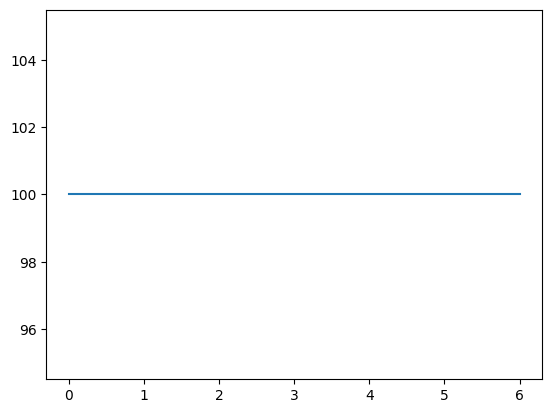

In [39]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [40]:
import os
import cv2

In [60]:
test_img_path = './leaf_linkoping_UNI/leaves test/2 - positive/1192.jpg'
img = cv2.imread(test_img_path)

In [42]:
## Feature exact
def feature_extract(img):
    names = ['area', 'Eccentridity', 'Extent', 'Contour Perimeter','Solidity', \
             'Equivalent Diameter', 'Perimeter Area Ratio']
    df = pd.DataFrame(columns=names)
    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #shape features
    contour, image = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contour[0]
    M = cv2.moments(cnt)


    contour_area = cv2.contourArea(cnt)
#Eccentricity sau
    numerator = 4 * M['mu11']**2 + (M['mu20'] - M['mu02'])**2
    denominator = (M['mu20'] + M['mu02'])**2
    eccentricity = np.sqrt(numerator / denominator)
    # print(f'Eccentricity: {eccentricity}')

    #Extent
    # Tính hình chữ nhật bao quanh
    x, y, w, h = cv2.boundingRect(cnt)
    # Tính diện tích của hình chữ nhật bao quanh
    bounding_rect_area = w * h


    # Tính Extent
    extent = contour_area / bounding_rect_area
    # print(f'Object Area: {contour_area}')


    #Chu vi đường viền
    perimeter = cv2.arcLength(cnt,True)


    # "Solidity" là tỷ lệ của diện tích của đường viền đến diện tích của lồi lõm.
    hull = cv2.convexHull (cnt)
    convex_hull_area = cv2.contourArea(hull)
    solidity = contour_area / convex_hull_area
    # print(f'Solidity of contour : {solidity}')



    # equivalent_diameter
    equivalent_diameter = np.sqrt(contour_area * 4 / np.pi)
    # print(f'Equivalent Diameter of contour : {equivalent_diameter}')

    
    #Tỷ lệ chu vi-diện tích (Perimeter-area ratio) 
    perimeter_area_ratio = perimeter / contour_area
    vector = [contour_area, eccentricity, extent, perimeter, solidity, equivalent_diameter, perimeter_area_ratio]
    df_temp = pd.DataFrame([vector], columns= names)
    df = pd.concat([df, df_temp], ignore_index=True)

    return df

In [71]:
from rembg import remove
from PIL import Image

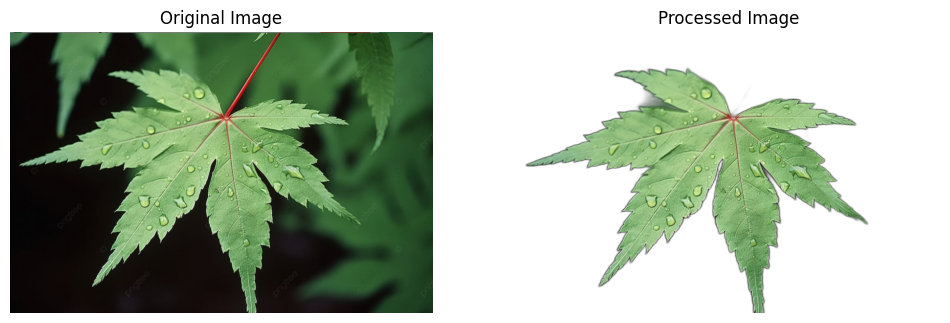

In [79]:
test_img_path = './anhtest.jpg'
inputImage = Image.open(test_img_path)
output_image = remove(inputImage)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Hiển thị hình ảnh gốc
axs[0].imshow(inputImage)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Hiển thị hình ảnh sau khi xử lý
axs[1].imshow(output_image, cmap='gray')
axs[1].set_title('Processed Image')
axs[1].axis('off')
# if output_image.mode == 'RGBA':
#     output_image = output_image.convert('RGB')
# output_image.save('./anhtest_remove.jpg')
img = cv2.imread('./anhtest_remove.jpg')

In [80]:
features_of_img = feature_extract(img)
features_of_img

,area,Eccentridity,Extent,Contour Perimeter,Solidity,Equivalent Diameter,Perimeter Area Ratio
0,580635.0,0.387806,0.997326,3112.0,1.0,859.818262,0.00536


In [81]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[-0.06180607 -0.75771274  2.63343459 -0.78632117  0.66437448  0.08833356
  -0.11915706]]


4

In [82]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'true indigo'